In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from typing import Any

matplotlibColors = plt.rcParams["axes.prop_cycle"].by_key()["color"]


In [2]:
def extractRunNameFromJson(fileName: str) -> str:
    fileName = fileName.removeprefix("logs_fit_")
    fileName = fileName.removesuffix("_train.json")
    fileName = fileName.removesuffix("_validation.json")
    return fileName


In [3]:
MaskFaceBasePath = "../graphs/data/MaskFace/"
jsonLogFilesMaskFace = os.listdir(MaskFaceBasePath)
AgeBasePath = "../graphs/data/Age/"
jsonLogFilesAge = os.listdir(AgeBasePath)

In [4]:
maskFaceTrain = dict()
maskFaceValidation = dict()
for jsonLogFile in jsonLogFilesMaskFace:
    if jsonLogFile.__contains__("train"):
        maskFaceTrain[extractRunNameFromJson(jsonLogFile)] = pd.read_json(
            MaskFaceBasePath + jsonLogFile
        )
    elif jsonLogFile.__contains__("validation"):
        maskFaceValidation[extractRunNameFromJson(jsonLogFile)] = pd.read_json(
            MaskFaceBasePath + jsonLogFile
        )


In [5]:
AgeTrain = dict()
AgeValidation = dict()
for jsonLogFile in jsonLogFilesAge:
    if jsonLogFile.__contains__("train"):
        AgeTrain[extractRunNameFromJson(jsonLogFile)] = pd.read_json(
            AgeBasePath + jsonLogFile
        )
    elif jsonLogFile.__contains__("validation"):
        AgeValidation[extractRunNameFromJson(jsonLogFile)] = pd.read_json(
            AgeBasePath + jsonLogFile
        )

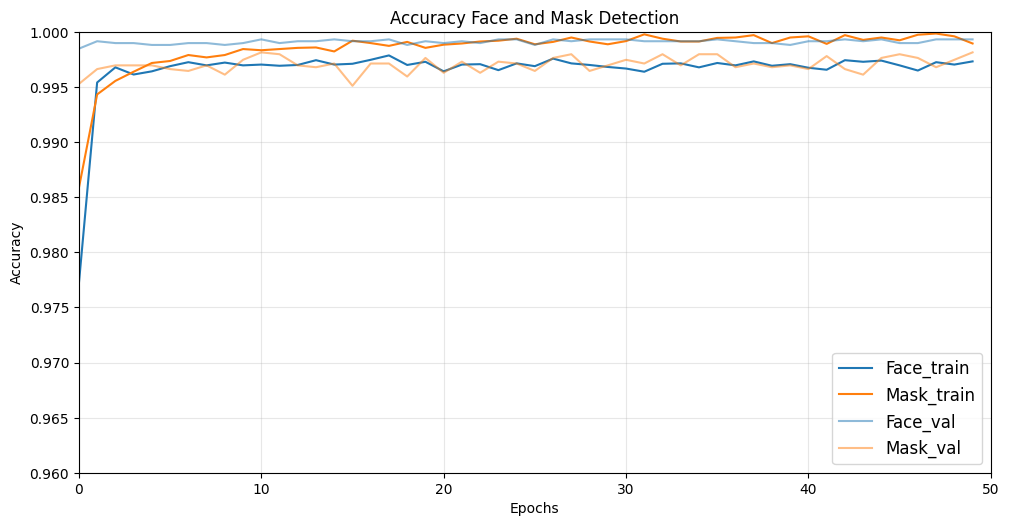

In [23]:
# comparison accuracy face and mask detection

fig, ax = plt.subplots()

ax.plot(
    maskFaceTrain["MobileNet_MultiTask_epochs-50_batch-32_Face"][1],
    maskFaceTrain["MobileNet_MultiTask_epochs-50_batch-32_Face"][2],
    label="Face_train",
)
ax.plot(
    maskFaceTrain["MobileNet_MultiTask_epochs-50_batch-32_Mask"][1],
    maskFaceTrain["MobileNet_MultiTask_epochs-50_batch-32_Mask"][2],
    label="Mask_train",
)

ax.plot(
    maskFaceValidation["MobileNet_MultiTask_epochs-50_batch-32_Face"][1],
    maskFaceValidation["MobileNet_MultiTask_epochs-50_batch-32_Face"][2],
    label="Face_val",
    alpha=0.5,
    color=matplotlibColors[0],
)
ax.plot(
    maskFaceValidation["MobileNet_MultiTask_epochs-50_batch-32_Mask"][1],
    maskFaceValidation["MobileNet_MultiTask_epochs-50_batch-32_Mask"][2],
    label="Mask_val",
    alpha=0.5,
    color=matplotlibColors[1],
)

# ax.annotate(
#     "0.9847",
#     xy=(9, 0.9847),
#     xycoords="data",
#     xytext=(-17, 20),
#     textcoords="offset points",
#     arrowprops=dict(arrowstyle="-"),
# )

ax.set_xlim([0, 50])
ax.set_ylim([0.96, 1.0])
ax.figure.set_size_inches([10, 5])
plt.tight_layout()
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy Face and Mask Detection")
ax.grid(alpha=0.3)
ax.legend(loc="lower right", prop={'size': 12})


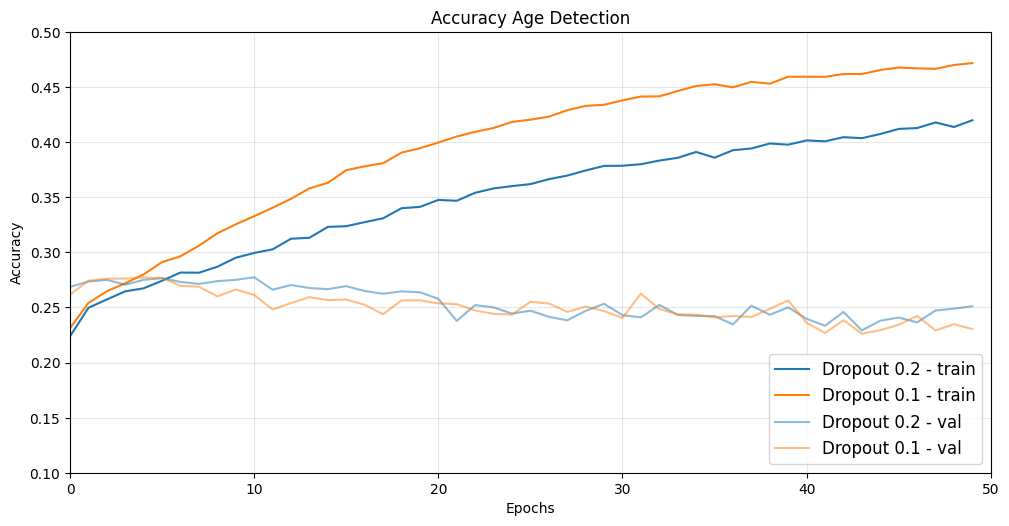

In [6]:
# comparison accuracy age detection, dropout

fig, ax = plt.subplots()

ax.plot(
    AgeTrain["MobileNet_MultiTask_epochs-50_batch-32"][1],
    AgeTrain["MobileNet_MultiTask_epochs-50_batch-32"][2],
    label="Dropout 0.2 - train",
)
ax.plot(
    AgeTrain["MobileNet_MultiTask_Dropout-10_epochs-50_batch-32"][1],
    AgeTrain["MobileNet_MultiTask_Dropout-10_epochs-50_batch-32"][2],
    label="Dropout 0.1 - train",
)

ax.plot(
    AgeValidation["MobileNet_MultiTask_epochs-50_batch-32"][1],
    AgeValidation["MobileNet_MultiTask_epochs-50_batch-32"][2],
    label="Dropout 0.2 - val",
    alpha=0.5,
    color=matplotlibColors[0],
)
ax.plot(
    AgeValidation["MobileNet_MultiTask_Dropout-10_epochs-50_batch-32"][1],
    AgeValidation["MobileNet_MultiTask_Dropout-10_epochs-50_batch-32"][2],
    label="Dropout 0.1 - val",
    alpha=0.5,
    color=matplotlibColors[1],
)

ax.set_xlim([0, 50])
ax.set_ylim([0.1, 0.5])
ax.figure.set_size_inches([10, 5])
plt.tight_layout()
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy Age Detection")
ax.grid(alpha=0.3)
ax.legend(loc="lower right", prop={'size': 12})

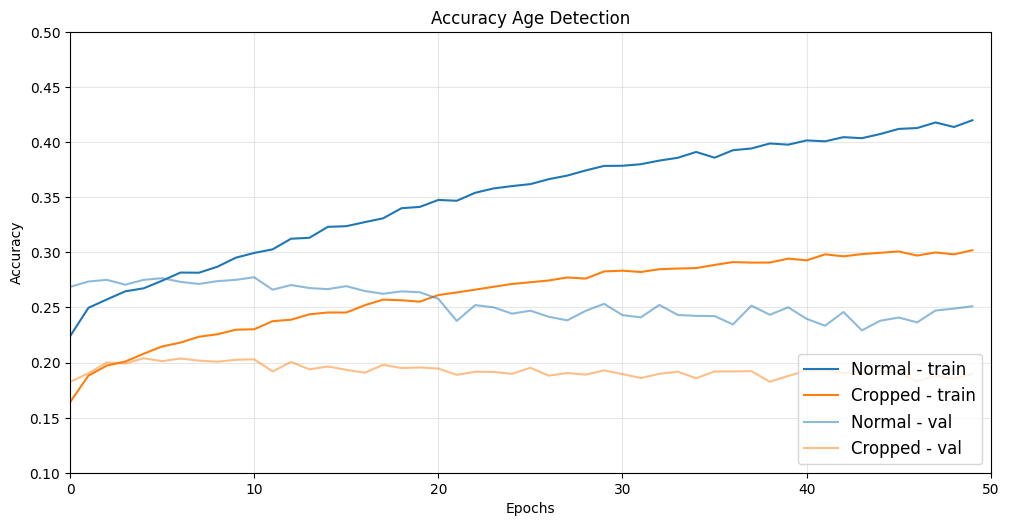

In [7]:
# comparison accuracy face and mask detection

fig, ax = plt.subplots()

ax.plot(
    AgeTrain["MobileNet_MultiTask_epochs-50_batch-32"][1],
    AgeTrain["MobileNet_MultiTask_epochs-50_batch-32"][2],
    label="Normal - train",
)
ax.plot(
    AgeTrain["MobileNet_MultiTask_Cropped_epochs-50_batch-32"][1],
    AgeTrain["MobileNet_MultiTask_Cropped_epochs-50_batch-32"][2],
    label="Cropped - train",
)

ax.plot(
    AgeValidation["MobileNet_MultiTask_epochs-50_batch-32"][1],
    AgeValidation["MobileNet_MultiTask_epochs-50_batch-32"][2],
    label="Normal - val",
    alpha=0.5,
    color=matplotlibColors[0],
)
ax.plot(
    AgeValidation["MobileNet_MultiTask_Cropped_epochs-50_batch-32"][1],
    AgeValidation["MobileNet_MultiTask_Cropped_epochs-50_batch-32"][2],
    label="Cropped - val",
    alpha=0.5,
    color=matplotlibColors[1],
)

ax.set_xlim([0, 50])
ax.set_ylim([0.1, 0.5])
ax.figure.set_size_inches([10, 5])
plt.tight_layout()
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy Age Detection")
ax.grid(alpha=0.3)
ax.legend(loc="lower right", prop={'size': 12})